# Finding best model and hyper paramter tunning using GirdSeachCv
---

**For iris flower dataset in sklearn.datasets , we are going to find out best model and best hyper parameter using GridSeachCV**

**load data iris flower dataset**

In [2]:
import pandas as pd 
from sklearn import datasets, svm

iris = datasets.load_iris()

In [4]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['folwer'] = iris.target
df['folwer'] = df['folwer'].apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),folwer
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Approach 1: Use train_test_split and manually tune parameter by trial and error 

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state= 124)

In [10]:
X_train[:5]

array([[7.9, 3.8, 6.4, 2. ],
       [6.8, 3.2, 5.9, 2.3],
       [6.6, 3. , 4.4, 1.4],
       [5.8, 4. , 1.2, 0.2],
       [4.7, 3.2, 1.6, 0.2]])

In [11]:
y_train[:5]

array([2, 2, 1, 0, 0])

In [12]:
model = svm.SVC(kernel = 'rbf', C= 30, gamma= 'auto')
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.9

# Approach 2: Use K Fold Cross validation

**Manually try suppling models with different parameters to cross_val_score funcsion with 5 fold cross validation**

In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
cross_val_score(svm.SVC(kernel = 'linear', C = 10, gamma = 'auto'), X_train, y_train, cv= 5)

array([1.        , 0.95833333, 1.        , 1.        , 1.        ])

In [16]:
cross_val_score(svm.SVC(kernel = 'rbf', C = 10, gamma = 'auto'), X_train, y_train, cv= 5)

array([0.95833333, 1.        , 1.        , 1.        , 1.        ])

In [17]:
cross_val_score(svm.SVC(kernel = 'rbf', C= 20, gamma = 'auto'), X_train, y_train, cv= 5)

array([0.95833333, 0.95833333, 1.        , 1.        , 1.        ])

**Above approach is tiersome and very manual. We can use for loop as an alternative**

In [19]:
import numpy as np

kernels = ['rbf', 'linear']
C = [1, 10, 20]
avg_scores = {}
for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(svm.SVC(kernel = kval , C = cval, gamma = 'auto'), X_train, y_train, cv= 5)
        avg_scores[kval + '_' + str(cval)] = np.average(cv_scores)

    
avg_scores

{'rbf_1': 0.9916666666666668,
 'rbf_10': 0.9916666666666668,
 'rbf_20': 0.9833333333333334,
 'linear_1': 1.0,
 'linear_10': 0.9916666666666668,
 'linear_20': 0.9916666666666668}

**From above result we can say that rbf with C = 1 or 10 or linear with C = 1 will give best performance** 

# Approach 3 : Use GridSeachCV

**GridSeachCV does exactly same thing as for loop above but in a single line of code**

In [20]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(svm.SVC(gamma = 'auto'),{
    'C' : [1,10,20],
    'kernel': ['rbf', 'linear']
}, cv = 5, return_train_score = False)

clf.fit(X_train, y_train)
clf.cv_results_

{'mean_fit_time': array([0.00117517, 0.00087667, 0.00087004, 0.00080729, 0.00086899,
        0.00085936]),
 'std_fit_time': array([2.80979790e-04, 2.91276867e-05, 1.98620850e-05, 1.83795830e-05,
        1.46004081e-05, 7.00552496e-05]),
 'mean_score_time': array([0.00071626, 0.00062585, 0.00059962, 0.00057049, 0.00059085,
        0.00057993]),
 'std_score_time': array([4.11475933e-05, 3.44671145e-05, 8.08235467e-06, 1.06745512e-05,
        6.62683572e-06, 2.08283431e-05]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'ker

In [21]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001175,0.000281,0.000716,0.000041,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.958333,1.000000,1.0,1.0,1.0,0.991667,0.016667,2
1,0.000877,0.000029,0.000626,0.000034,1,linear,"{'C': 1, 'kernel': 'linear'}",1.000000,1.000000,1.0,1.0,1.0,1.000000,0.000000,1
2,0.000870,0.000020,0.000600,0.000008,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.958333,1.000000,1.0,1.0,1.0,0.991667,0.016667,2
3,0.000807,0.000018,0.000570,0.000011,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,0.958333,1.0,1.0,1.0,0.991667,0.016667,2
4,0.000869,0.000015,0.000591,0.000007,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.958333,0.958333,1.0,1.0,1.0,0.983333,0.020412,6
5,0.000859,0.000070,0.000580,0.000021,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,0.958333,1.0,1.0,1.0,0.991667,0.016667,2


In [22]:
df[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.991667
1,1,linear,1.000000
2,10,rbf,0.991667
3,10,linear,0.991667
4,20,rbf,0.983333
5,20,linear,0.991667


In [23]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [24]:
clf.best_score_

1.0

**Use RandomizedSeachCV to reduce number of iteration and with random combination of parammeter. This is useful when you have too many parameter to try and your training time is longer. It hepls reduce the cost of computation**

In [26]:
from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(svm.SVC(gamma='auto'),{
    'C': [1,10,20],
    'kernel': ['rbf', 'linear']
},cv = 5, return_train_score= False, n_iter = 2)

rs.fit(X_train, y_train)
pd.DataFrame(rs.cv_results_)[['param_C', 'param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,10,linear,0.991667
1,20,linear,0.991667


**How about different models with different hyperparameters ?**  

In [27]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


model_params = {
    'svm':{
        'model': svm.SVC(gamma = 'auto'),
        'params': {
            'C': [1,10,20],
            'kernel': ['rbf', 'linear']
        }
    },
    'random_forest':{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression':{
        'model': LogisticRegression(solver = 'liblinear', multi_class = 'auto'),
        'params':{
            'C': [1,5,10]
        }
    }
}

In [29]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv= 5, return_train_score = False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
    
df = pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])
df

,model,best_score,best_params
0,svm,1.000000,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.983333,{'n_estimators': 5}
2,logistic_regression,0.966667,{'C': 5}


# Exercise

For digits datasets in sklearn.dataset, please try following classfiers and find out the best performance. Also find the optimal paramenter for that classifier.

```
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
```

In [31]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits

In [32]:
digits = load_digits()

In [33]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

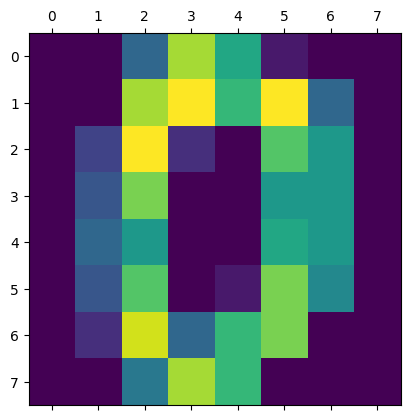

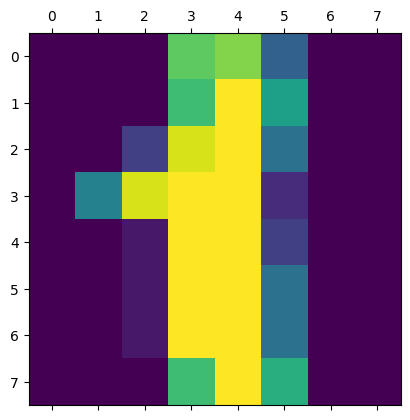

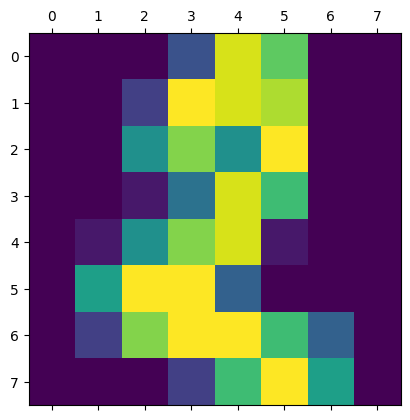

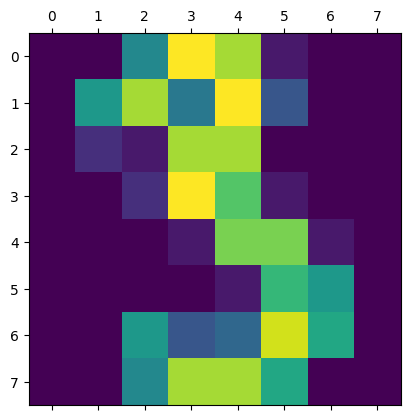

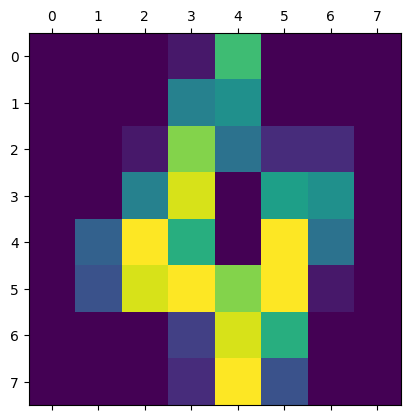

In [39]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.matshow(digits.images[i])

In [40]:
df = pd.DataFrame(digits.data, columns = digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [44]:
model_params = {
    'svm':{
        'model': svm.SVC(gamma = 'auto'),
        'params': {
            'C': [1,10,20],
            'kernel': ['rbf', 'linear']
        }
    },
    'Random Forest':{
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1,5,10]
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(solver = 'liblinear', multi_class = 'auto'),
        'params':{
            'C': [1,5,10]
        }
    },
    'GaussianNB': {
        'model': GaussianNB(),
        'params': {
            
        }
    },
    'MultinomialNB':{
        'model': MultinomialNB(force_alpha= True),
        'params': {
            
        }
    },
    'DecisionTreeClassifier':{
        'model': DecisionTreeClassifier(),
        'params': {
            
        }
    }
} 

In [45]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv= 5, return_train_score = False)
    clf.fit(digits.data, digits.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
    
df = pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])
df

,model,best_score,best_params
0,svm,0.947697,"{'C': 1, 'kernel': 'linear'}"
1,Random Forest,0.898745,{'n_estimators': 10}
2,Logistic Regression,0.922114,{'C': 1}
3,GaussianNB,0.806928,{}
4,MultinomialNB,0.870350,{}
5,DecisionTreeClassifier,0.788024,{}
